In [1]:
import os
from pathlib import Path

import librosa
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import wavfile
from scipy.fft import fft, fftfreq

In [3]:
PARENT_DIR = Path('__file__').resolve().parent
t11_a1_audio = os.path.join(PARENT_DIR, 't11_a1_2025-09-24_16_51 (online-audio-converter.com).wav')
t11_e1_audio = os.path.join(PARENT_DIR, 't11_e1_2025-09-24_16_51 (online-audio-converter.com).wav')
t11_s1_audio = os.path.join(PARENT_DIR, 't11_s1_2025-09-24_16_51 (online-audio-converter.com).wav')


In [4]:
def plot_audio_analysis(audio_path):
    # Load audio file
    y, sr = librosa.load(audio_path, sr=None)  # y = waveform, sr = sample rate
    duration = len(y) / sr
    time = np.linspace(0, duration, len(y))

    # FFT
    N = len(y)
    yf = fft(y)
    xf = fftfreq(N, 1 / sr)[:N // 2]
    spectrum = np.abs(yf[:N // 2])

    # Spectrogram
    S = librosa.stft(y)
    S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

    # Plot
    fig, axs = plt.subplots(3, 1, figsize=(12, 10))

    # Waveform
    axs[0].plot(time, y, color='blue')
    axs[0].set_title('Waveform')
    axs[0].set_xlabel('Time [s]')
    axs[0].set_ylabel('Amplitude')

    # FFT Spectrum
    axs[1].plot(xf, spectrum, color='green')
    axs[1].set_title('FFT Spectrum')
    axs[1].set_xlabel('Frequency [Hz]')
    axs[1].set_ylabel('Magnitude')
    axs[1].set_xlim(0, sr / 2)  # Limit to Nyquist

    # Spectrogram
    img = librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', ax=axs[2], cmap='gray_r')
    axs[2].set_title('Spectrogram (dB)')
    #fig.colorbar(img, ax=axs[2], format='%+2.0f dB')

    plt.tight_layout()
    plt.show()

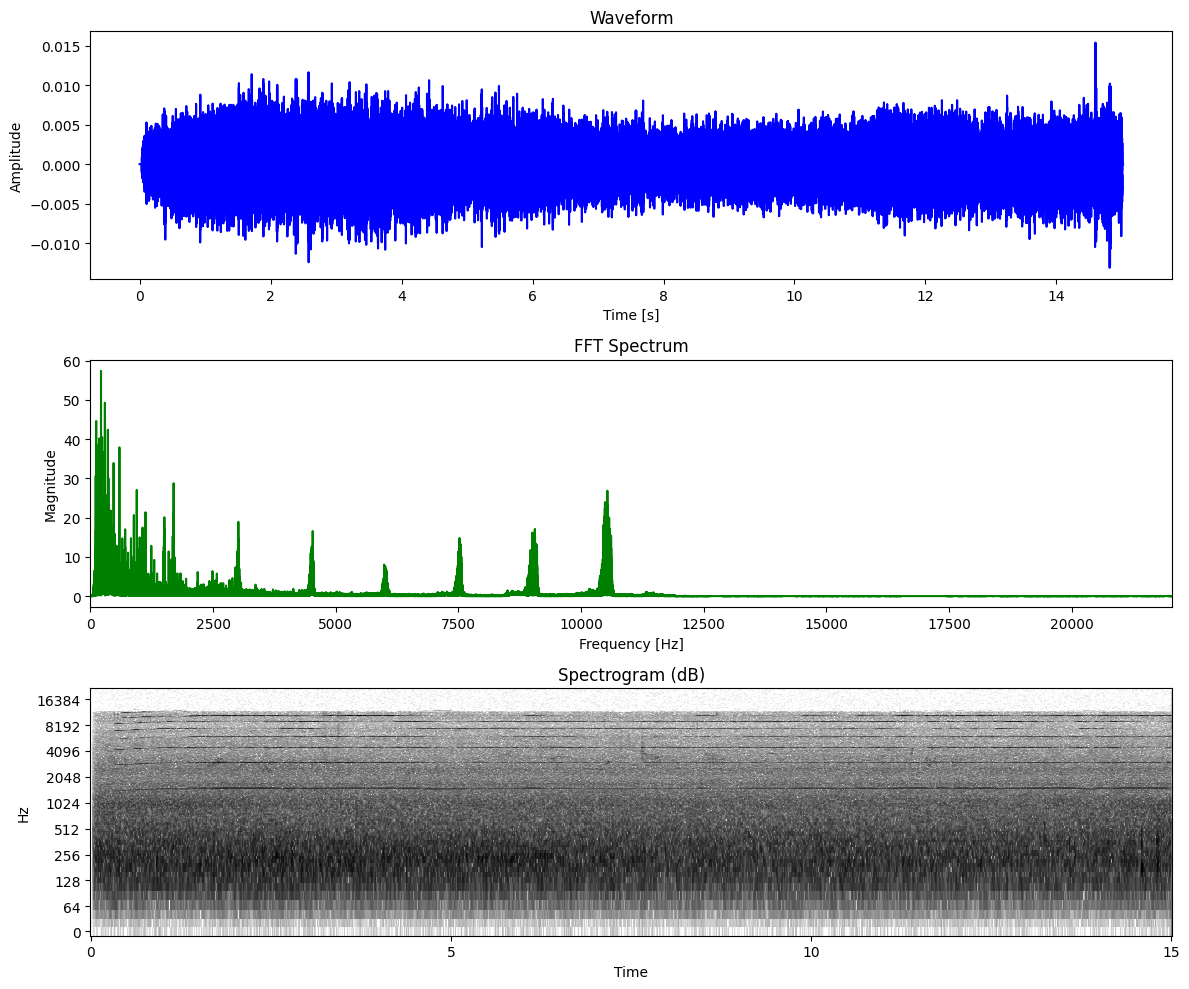

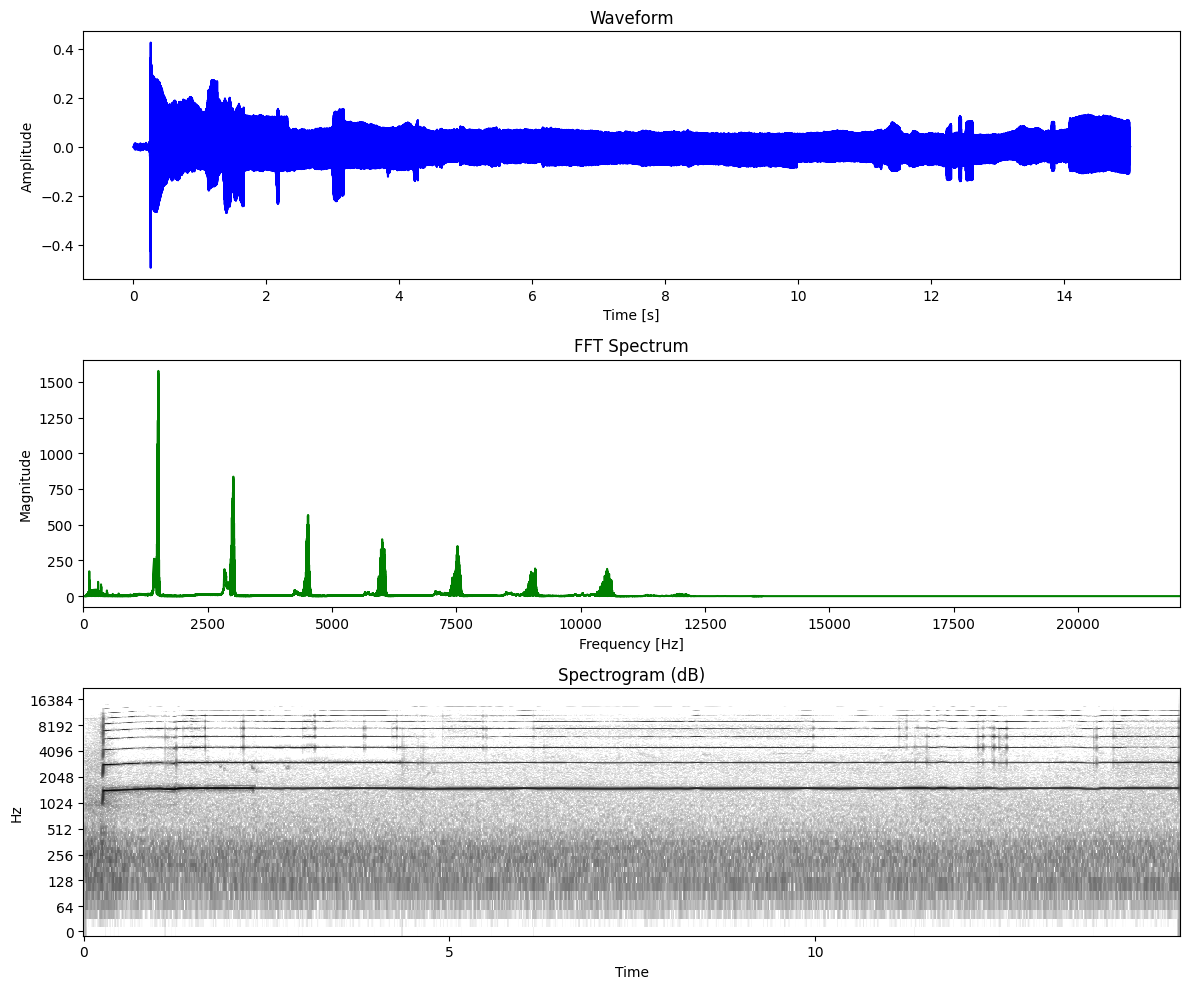

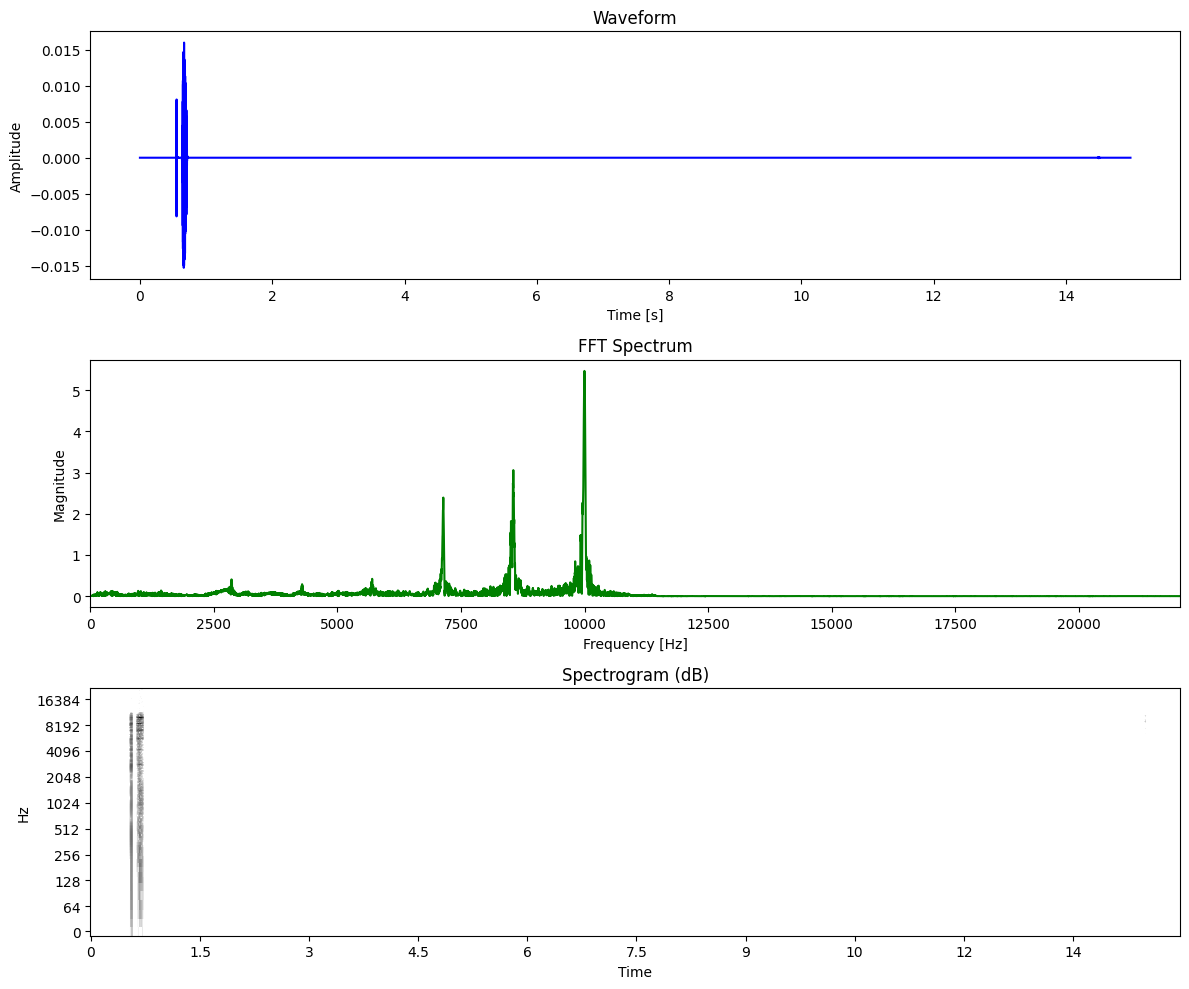

In [6]:
plot_audio_analysis(t11_e1_audio)
plot_audio_analysis(t11_a1_audio)
plot_audio_analysis(t11_s1_audio)
